# Testing Jacobian Regularization on MNIST using LeNet

### Imports and Data Loading

In [1]:
import torch
import jupyter_black
from torchsummary import summary

from data_generators import data_loader_MNIST
from model_classes import LeNet_MNIST
from tools import train
from plotting_tools import (
    plot_results,
    plot_reg_results,
    plot_activations_pca,
    plot_decision_boundary,
)

jupyter_black.load()

In [2]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Loading MNIST dataset
in_channels = 1
train_loader, test_loader = data_loader_MNIST()
summary_model = LeNet_MNIST(lr=0.01, momentum=0.9, in_channels=in_channels).to(device)
summary(summary_model, (in_channels, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 24, 24]           156
├─MaxPool2d: 1-2                         [-1, 6, 12, 12]           --
├─Conv2d: 1-3                            [-1, 16, 8, 8]            2,416
├─MaxPool2d: 1-4                         [-1, 16, 4, 4]            --
├─Linear: 1-5                            [-1, 120]                 30,840
├─Dropout: 1-6                           [-1, 120]                 --
├─Linear: 1-7                            [-1, 84]                  10,164
├─Dropout: 1-8                           [-1, 84]                  --
├─Linear: 1-9                            [-1, 10]                  850
Total params: 44,426
Trainable params: 44,426
Non-trainable params: 0
Total mult-adds (M): 0.28
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.17
Estimated Total Size (MB): 0.21


Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 24, 24]           156
├─MaxPool2d: 1-2                         [-1, 6, 12, 12]           --
├─Conv2d: 1-3                            [-1, 16, 8, 8]            2,416
├─MaxPool2d: 1-4                         [-1, 16, 4, 4]            --
├─Linear: 1-5                            [-1, 120]                 30,840
├─Dropout: 1-6                           [-1, 120]                 --
├─Linear: 1-7                            [-1, 84]                  10,164
├─Dropout: 1-8                           [-1, 84]                  --
├─Linear: 1-9                            [-1, 10]                  850
Total params: 44,426
Trainable params: 44,426
Non-trainable params: 0
Total mult-adds (M): 0.28
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.17
Estimated Total Size (MB): 0.21

In [4]:
# Hyperparameters
lr = 0.01
momentum = 0.9
l1_lmbd = 0.00001
l2_lmbd = 0.0001
jacobi_reg_lmbd = 0.001

### No regularization

#### Training

In [5]:
model_no_reg = LeNet_MNIST(lr=lr, momentum=momentum, in_channels=in_channels).to(device)
n_epochs = 5
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model_no_reg, device, n_epochs
)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0


 20%|██        | 1/5 [00:33<02:15, 33.77s/it]

Accuracy of the network on the test images: 96 %
Epoch: 1


 40%|████      | 2/5 [01:06<01:39, 33.23s/it]

Accuracy of the network on the test images: 97 %
Epoch: 2


 60%|██████    | 3/5 [01:41<01:07, 33.95s/it]

Accuracy of the network on the test images: 98 %
Epoch: 3


 80%|████████  | 4/5 [02:29<00:39, 39.48s/it]

Accuracy of the network on the test images: 98 %
Epoch: 4


100%|██████████| 5/5 [03:05<00:00, 37.03s/it]

Accuracy of the network on the test images: 98 %


#### Visualization

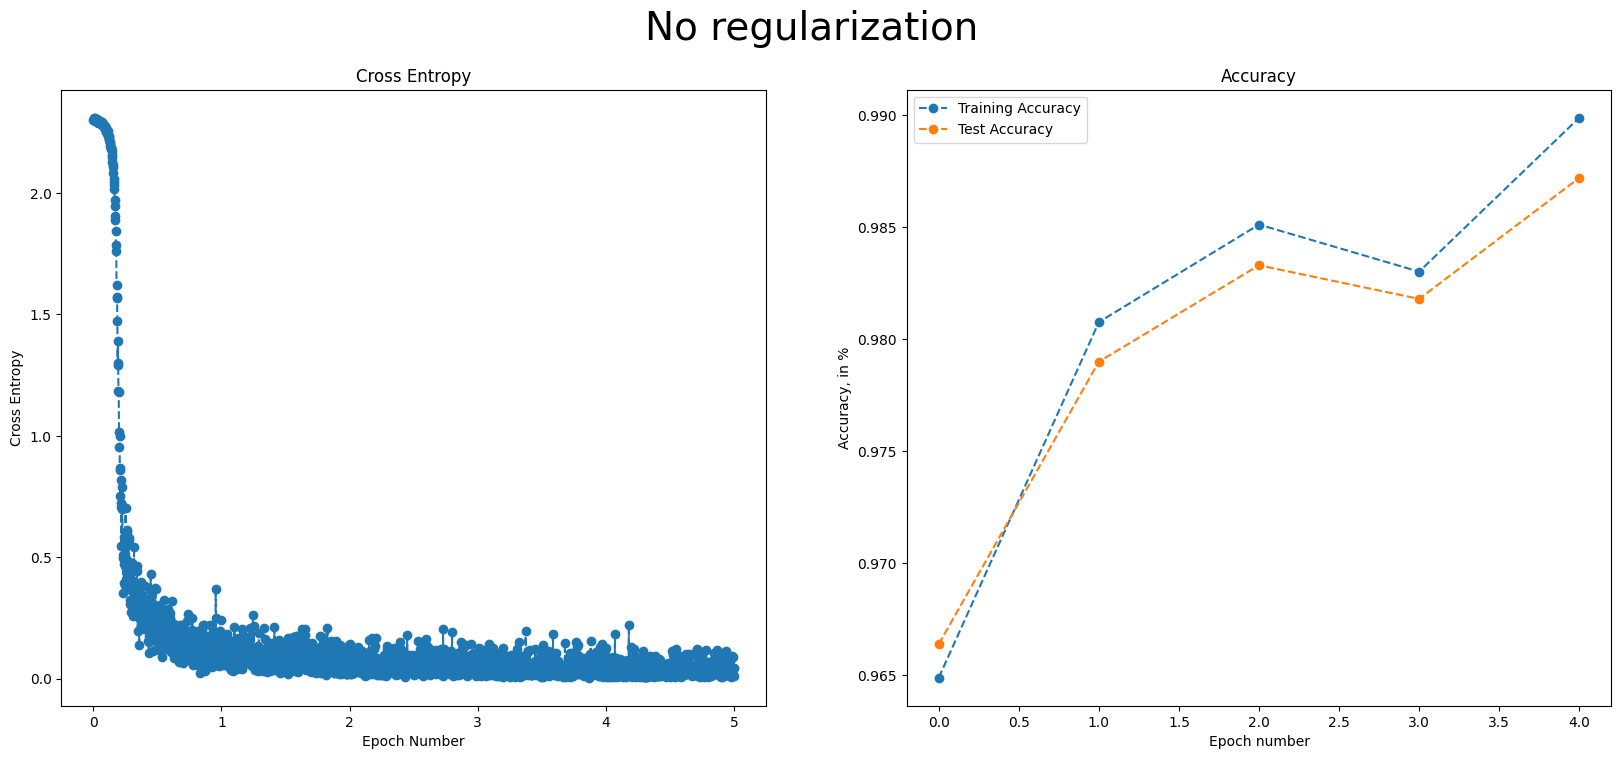

In [6]:
plot_results(
    epochs, losses, train_accuracies, test_accuracies, title="No regularization"
)

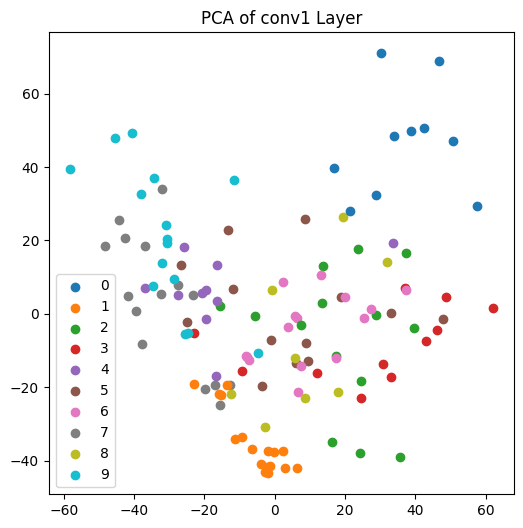

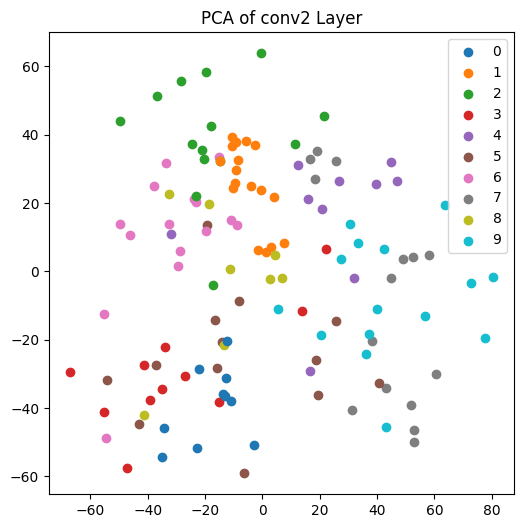

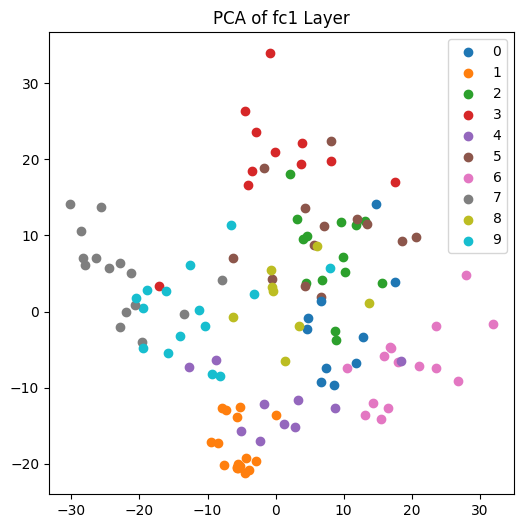

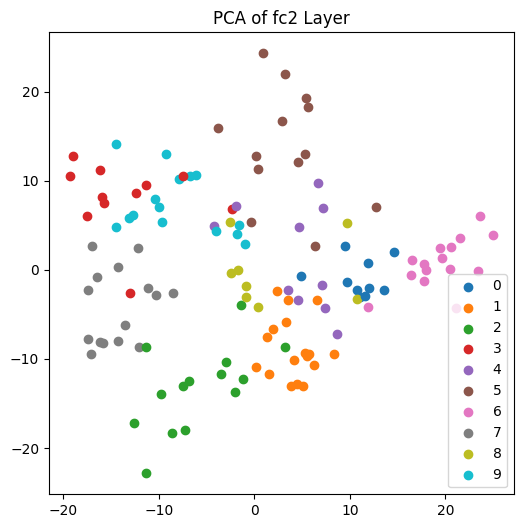

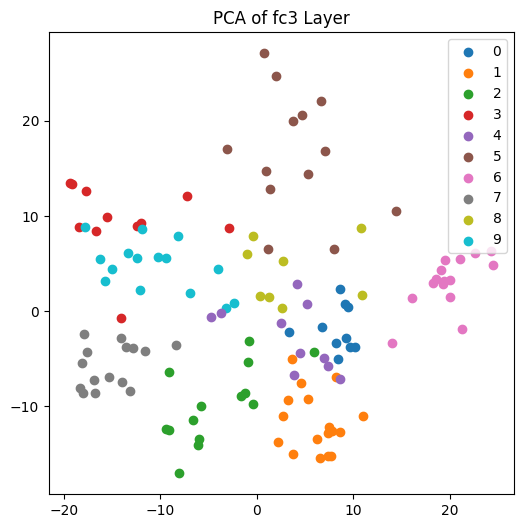

In [7]:
plot_activations_pca(model_no_reg, train_loader, device)

### L2 Regularization

#### Training

In [8]:
model_l2 = LeNet_MNIST(
    lr=lr, momentum=momentum, in_channels=in_channels, l2=True, l2_lmbd=l2_lmbd
).to(device)
n_epochs = 3
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model_l2, device, n_epochs
)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0


 33%|███▎      | 1/3 [00:37<01:14, 37.49s/it]

Accuracy of the network on the test images: 97 %
Epoch: 1


 67%|██████▋   | 2/3 [01:14<00:37, 37.23s/it]

Accuracy of the network on the test images: 98 %
Epoch: 2


100%|██████████| 3/3 [01:50<00:00, 36.97s/it]

Accuracy of the network on the test images: 98 %


#### Visualization

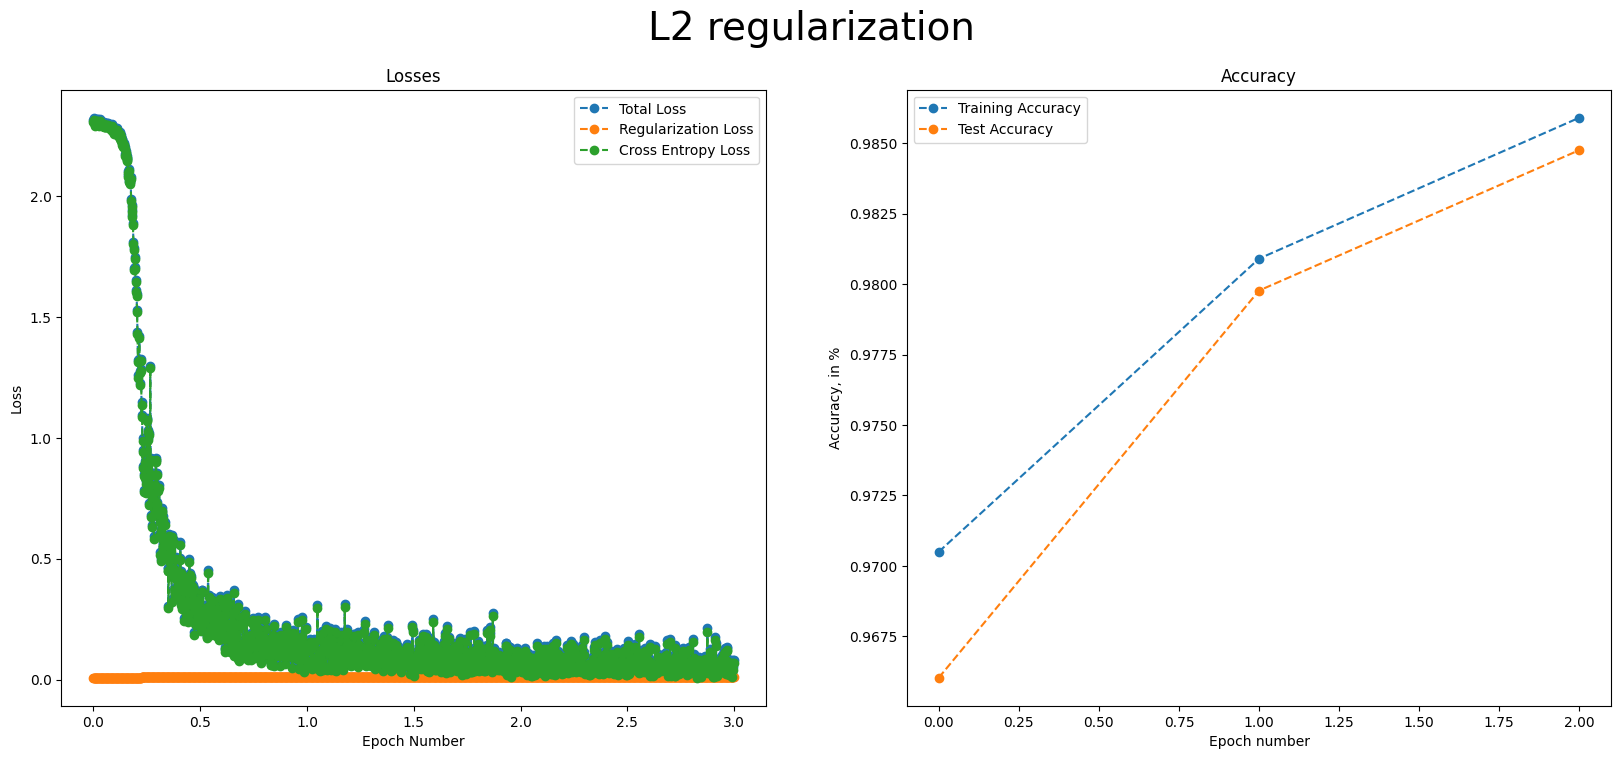

In [9]:
plot_reg_results(
    epochs,
    losses,
    reg_losses,
    train_accuracies,
    test_accuracies,
    title="L2 regularization",
)

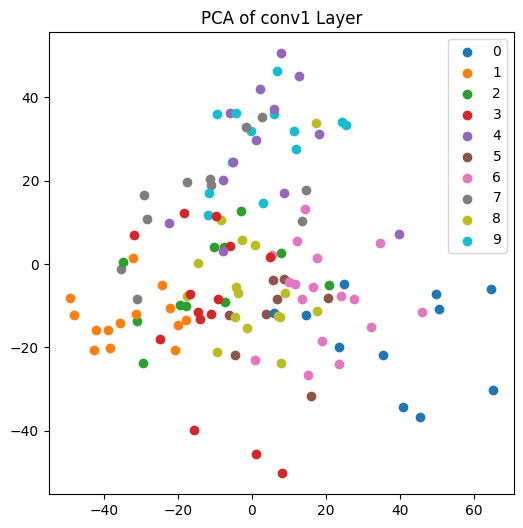

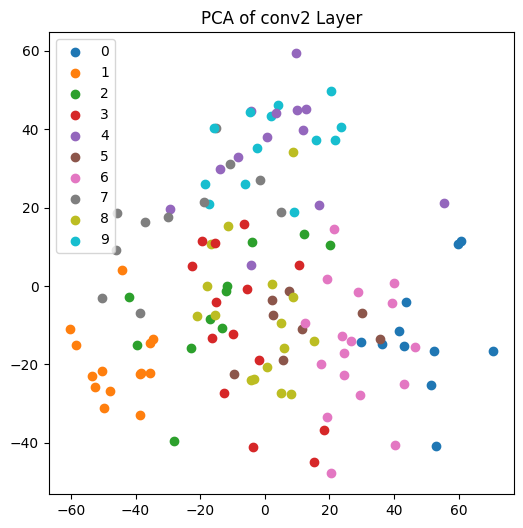

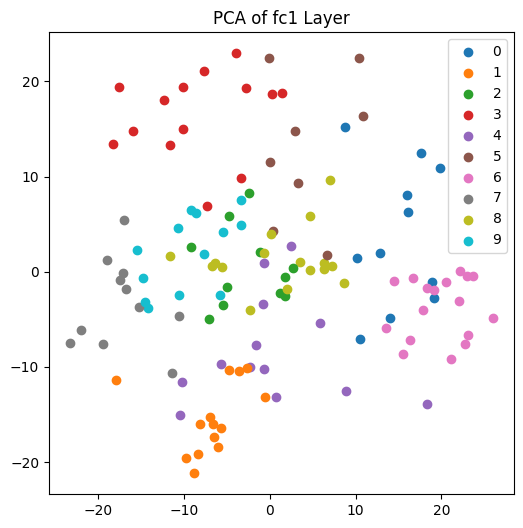

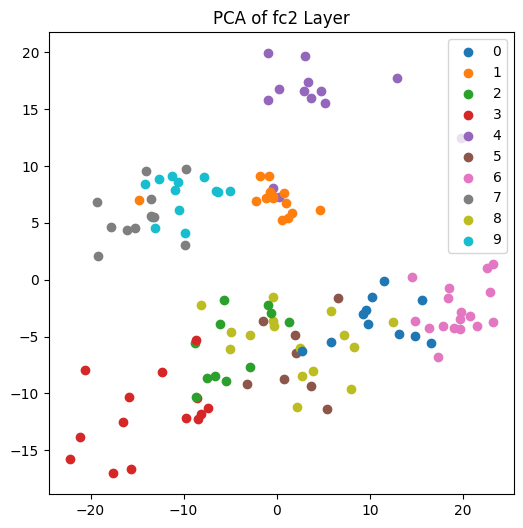

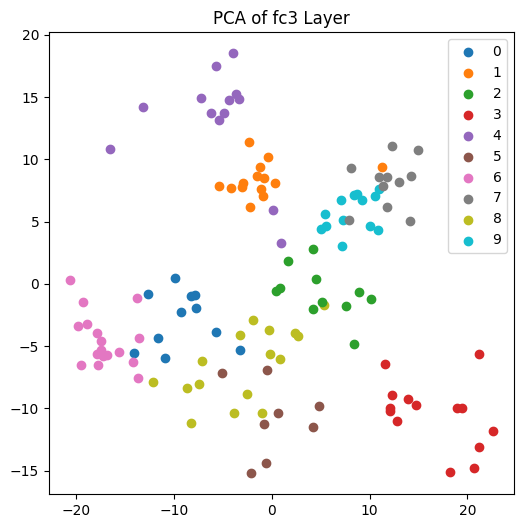

In [10]:
plot_activations_pca(model_l2, train_loader, device)

### Jacobi Regularization

### Training

In [11]:
model_jacobi = LeNet_MNIST(
    lr=lr,
    momentum=momentum,
    in_channels=in_channels,
    jacobi_reg=True,
    jacobi_reg_lmbd=jacobi_reg_lmbd,
).to(device)
n_epochs = 10
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model_jacobi, device, n_epochs
)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0


 10%|█         | 1/10 [00:44<06:36, 44.09s/it]

Accuracy of the network on the test images: 96 %
Epoch: 1


 20%|██        | 2/10 [01:32<06:11, 46.44s/it]

Accuracy of the network on the test images: 97 %
Epoch: 2


 30%|███       | 3/10 [02:18<05:24, 46.43s/it]

Accuracy of the network on the test images: 97 %
Epoch: 3


 40%|████      | 4/10 [03:05<04:39, 46.63s/it]

Accuracy of the network on the test images: 98 %
Epoch: 4


 50%|█████     | 5/10 [03:52<03:54, 46.85s/it]

Accuracy of the network on the test images: 98 %
Epoch: 5


 60%|██████    | 6/10 [04:38<03:05, 46.49s/it]

Accuracy of the network on the test images: 98 %
Epoch: 6


 70%|███████   | 7/10 [05:26<02:20, 46.86s/it]

Accuracy of the network on the test images: 98 %
Epoch: 7


 80%|████████  | 8/10 [06:10<01:31, 45.94s/it]

Accuracy of the network on the test images: 98 %
Epoch: 8


 90%|█████████ | 9/10 [06:55<00:45, 45.71s/it]

Accuracy of the network on the test images: 98 %
Epoch: 9


100%|██████████| 10/10 [07:42<00:00, 46.22s/it]

Accuracy of the network on the test images: 98 %


#### Visualization

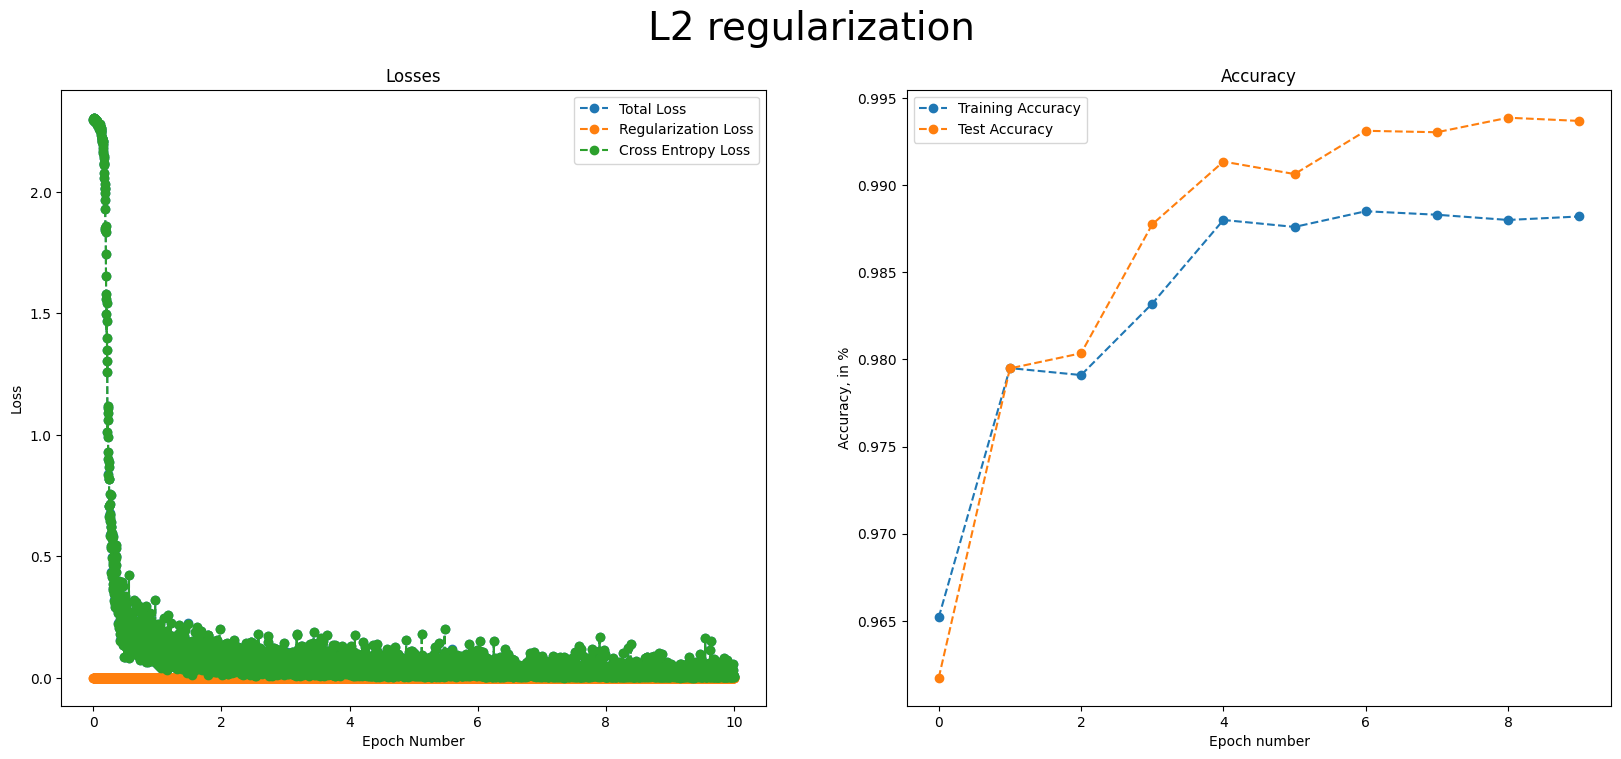

In [12]:
plot_reg_results(
    epochs,
    losses,
    reg_losses,
    train_accuracies,
    test_accuracies,
    title="L2 regularization",
)

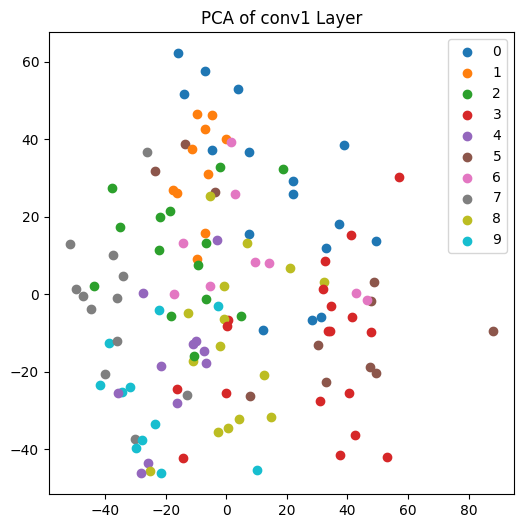

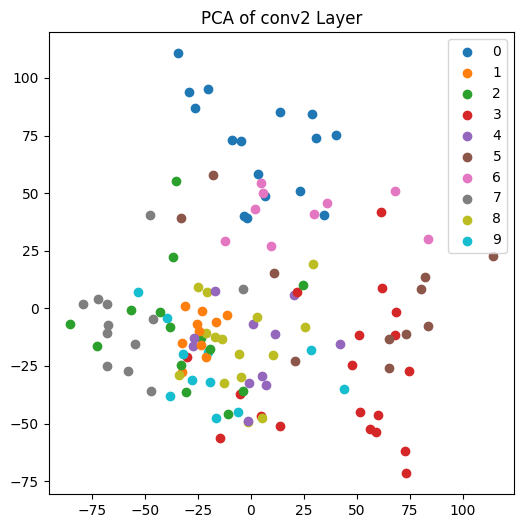

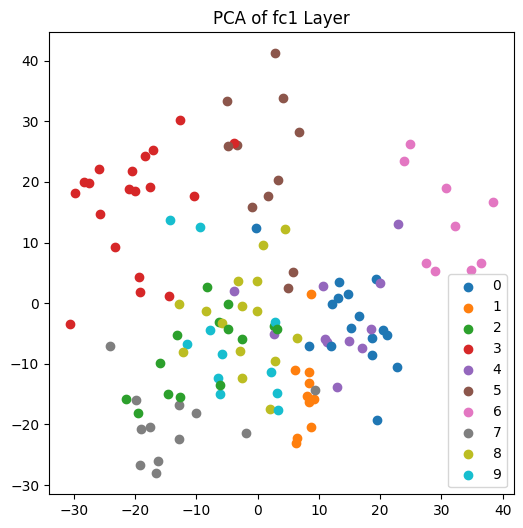

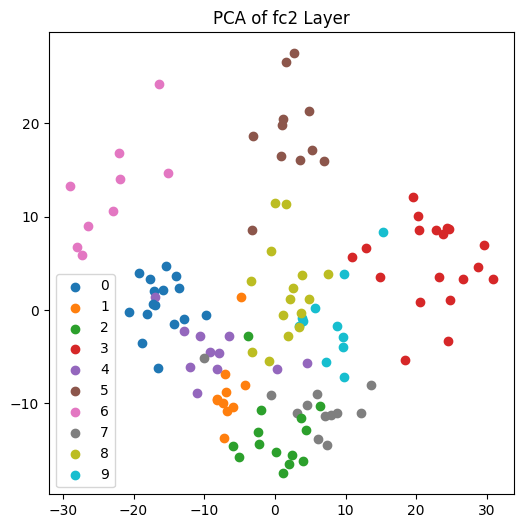

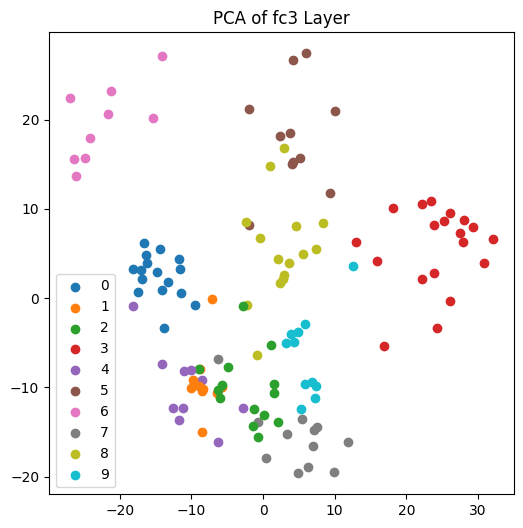

In [13]:
plot_activations_pca(model_jacobi, train_loader, device)

In [14]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
import numpy as np
import scipy.ndimage as ndi


def plot_decision_boundary(
    model, img, v1, v2, img_class, device, resolution=300, zoom=0.01
):
    # Make sure the model is in evaluation mode
    model.eval()

    # Flatten the image if necessary and convert to a single precision float
    if img.dim() > 2:
        img = img.view(-1)
    img = img.to(device).float()

    # Generate grid
    scale = 1 / zoom  # to define the size of the plane in the image space
    x = torch.linspace(-scale, scale, resolution)
    y = torch.linspace(-scale, scale, resolution)
    xv, yv = torch.meshgrid(x, y)

    # Create the 2D plane passing through the image
    plane = (
        img[None, None, :]
        + xv[..., None] * v1[None, None, :]
        + yv[..., None] * v2[None, None, :]
    )

    # Compute the model prediction
    plane = plane.to(device)
    with torch.no_grad():
        output = model(plane.view(-1, 1, 28, 28)).view(resolution, resolution, -1)
    probs = torch.nn.functional.softmax(output, dim=-1)

    # Get the class with the highest probability
    _, predictions = torch.max(probs, dim=-1)

    # Calculate the distance to the closest decision boundary
    decision_boundary = ndi.morphology.distance_transform_edt(
        predictions.cpu().numpy()
        == img_class
        # == predictions.cpu().numpy()[resolution // 2, resolution // 2]
    )
    distance_to_boundary = (
        decision_boundary[resolution // 2, resolution // 2] / resolution * 2 * scale
    )

    # Draw the figure
    plt.figure(figsize=(8, 8))

    # Create a colormap where each index i corresponds to the color for digit i
    colors = plt.get_cmap("tab10").colors  # get the colors used in the 'tab10' colormap
    cmap = ListedColormap([colors[i] for i in range(10)])  # create a new colormap

    # Use 'imshow' instead of 'contourf'; note the 'origin' argument
    plt.imshow(
        predictions.cpu(),
        origin="lower",
        extent=(-scale, scale, -scale, scale),
        cmap=cmap,
        alpha=1,
    )

    # Also, let's add the original image as a dot in the middle of our plot
    plt.plot(0, 0, "ro")

    # Draw a circle around the original image with a radius equal to the distance to the closest decision boundary
    circle = plt.Circle((0, 0), distance_to_boundary, color="black", fill=False)
    plt.gca().add_patch(circle)

    # Set legend
    legend_elements = [
        Patch(facecolor=cmap(i), edgecolor=cmap(i), label=str(i)) for i in range(10)
    ]
    plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.show()


def generate_random_vectors(img):
    # Generate random vectors
    v1 = torch.randn_like(img)
    v2 = torch.randn_like(img)
    v1 /= v1.norm()
    v2 -= v1 * (v1.dot(v2))  # make orthogonal to v1
    v2 /= v2.norm()
    return v1, v2

In [19]:
# Get a batch of data from the test_loader
images, labels = next(iter(test_loader))

# Get the first image of the batch
first_image = images[0]
first_label = labels[0].item()

# If your image has a channel dimension (as it should in the case of the MNIST dataset), remove it
if first_image.dim() > 2:
    first_image = first_image.squeeze(0)

# Flatten the image
first_image_flattened = first_image.view(-1)
first_image_flattened_toprint = first_image.view(1, 1, 28, 28).to(device)

Prediction without regularization: 7
Prediction with Jacobian regularization: 7
First label: 7


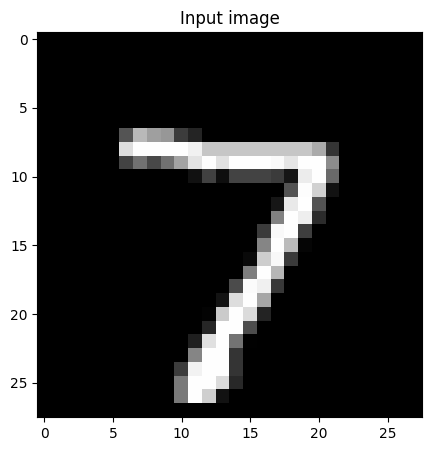

In [20]:
# Print the prediction of the two models
model_no_reg.eval()
model_jacobi.eval()

with torch.no_grad():
    output_no_reg = model_no_reg(first_image_flattened_toprint)
    output_jacobi = model_jacobi(first_image_flattened_toprint)

# Get the predicted classes
_, predicted_no_reg = torch.max(output_no_reg, 1)
_, predicted_jacobi = torch.max(output_jacobi, 1)

print(f"Prediction without regularization: {predicted_no_reg.item()}")
print(f"Prediction with Jacobian regularization: {predicted_jacobi.item()}")
print(f"First label: {first_label}")

# Plot the image
plt.figure(figsize=(5, 5))
plt.imshow(first_image.numpy(), cmap="gray")
plt.title("Input image")
plt.show()

# Plot the decision boundaries for the two models
v1, v2 = generate_random_vectors(first_image_flattened)

C:\Users\aslak\AppData\Local\Temp\ipykernel_15740\2926673318.py:42: DeprecationWarning: Please use `distance_transform_edt` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  decision_boundary = ndi.morphology.distance_transform_edt(


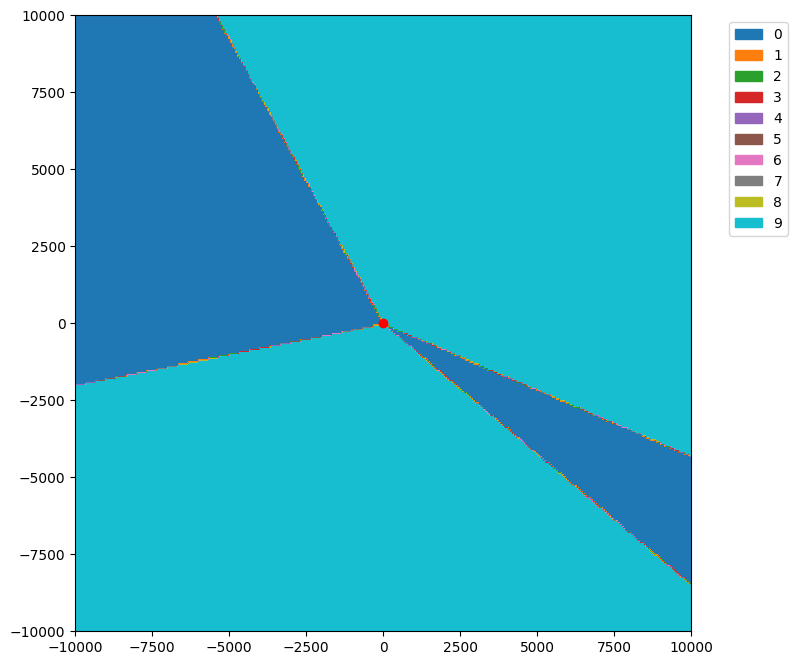

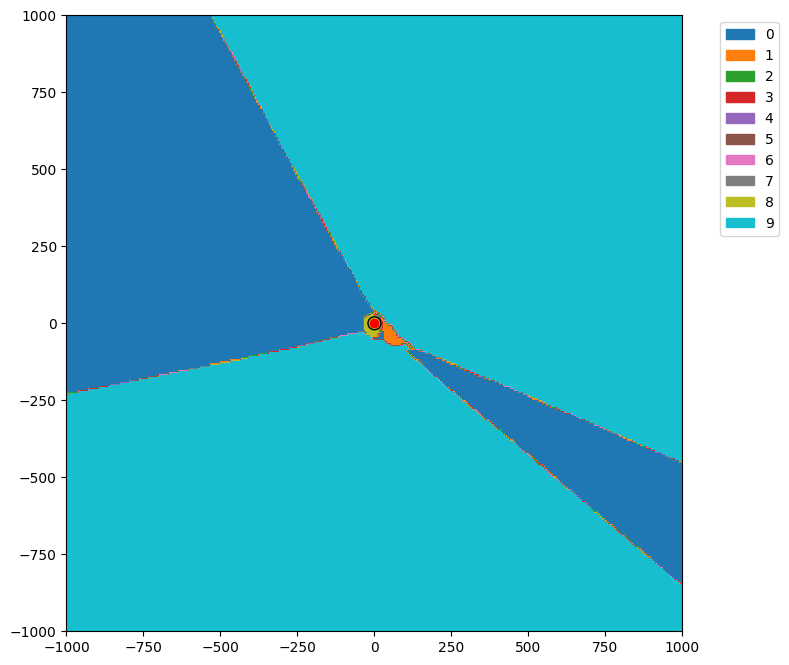

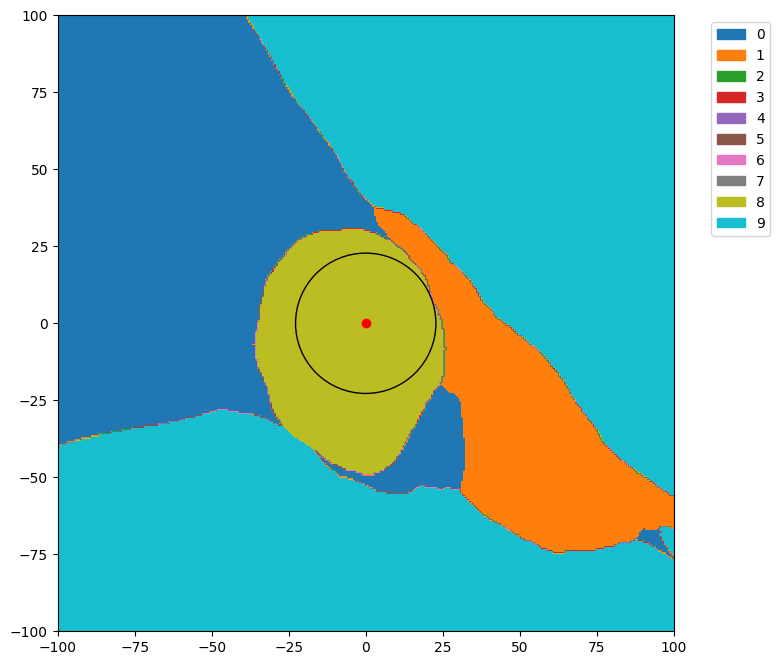

In [21]:
for zoom_val in [0.0001, 0.001, 0.01]:
    plot_decision_boundary(
        model_no_reg, first_image_flattened, v1, v2, first_label, device, zoom=zoom_val
    )

C:\Users\aslak\AppData\Local\Temp\ipykernel_15740\2926673318.py:42: DeprecationWarning: Please use `distance_transform_edt` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  decision_boundary = ndi.morphology.distance_transform_edt(


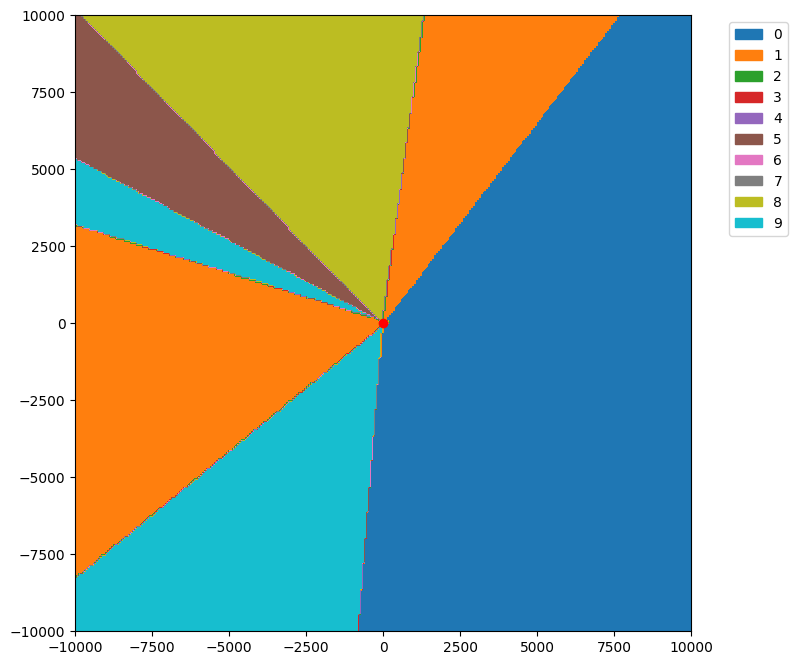

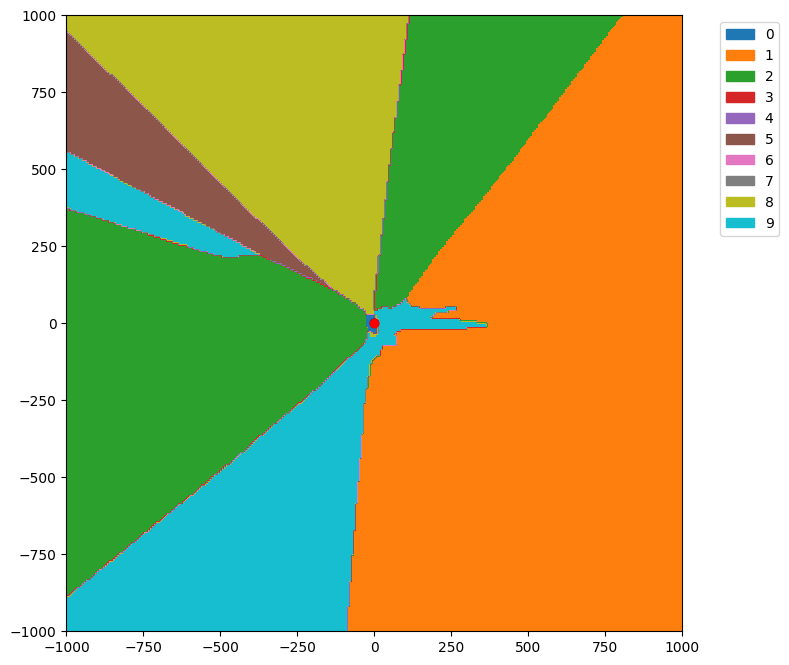

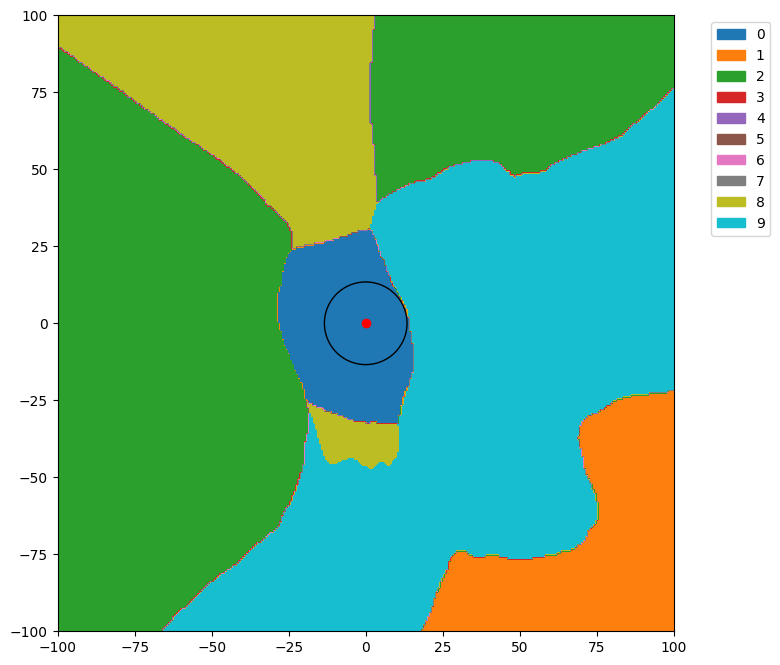

In [18]:
for zoom_val in [0.0001, 0.001, 0.01]:
    plot_decision_boundary(
        model_jacobi, first_image_flattened, v1, v2, first_label, device, zoom=zoom_val
    )